In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/titanic.csv", usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [4]:
data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [5]:
# Let's separate into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(
    data[["age", "fare"]],  # predictors
    data["survived"],  # target
    test_size=0.5,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((654, 2), (655, 2))

In [6]:
# Let's explore the missing data in the train set.
# The percentage of NA should be fairly similar to those
# observed in the whole dataset.

X_train.isnull().mean()

age     0.191131
fare    0.000000
dtype: float64

In [7]:
# Calculate the median Age.

median = X_train.age.median()
median

28.0

In [8]:
# Calculate the mean Age

mean = X_train.age.mean()

# The mean contains many decimals, so I round to 1
# using the round function from numpy.
mean = np.round(mean, 1)

mean

30.0

In [9]:
# Create a new variable with the missing values replaced
# using the function we created above.

# First, replace with the median.
X_train["Age_median"] = X_train["age"].fillna(median)

# Now replace with the mean.
X_train["Age_mean"] = X_train["age"].fillna(mean)

X_train.head(15)

,age,fare,Age_median,Age_mean
293,NaN,52.0000,28.0,30.0
76,39.0,83.1583,39.0,39.0
48,53.0,27.4458,53.0,53.0
689,22.0,7.2500,22.0,22.0
1195,NaN,7.7500,28.0,30.0
1182,21.0,7.6500,21.0,21.0
332,23.0,10.5000,23.0,23.0
576,40.0,13.0000,40.0,40.0
622,4.0,31.2750,4.0,4.0
564,40.0,13.0000,40.0,40.0


In [10]:
# We can see a change in the variance after mean / median imputation.
# This is expected, because the percentage of missing data is quite
# high in Age, ~20%.

print("Original variable variance: ", X_train["age"].var())
print("Variance after median imputation: ", X_train["Age_median"].var())
print("Variance after mean imputation: ", X_train["Age_mean"].var())

Original variable variance:  194.29926044010145
Variance after median imputation:  157.7015471214206
Variance after mean imputation:  157.10590761240317


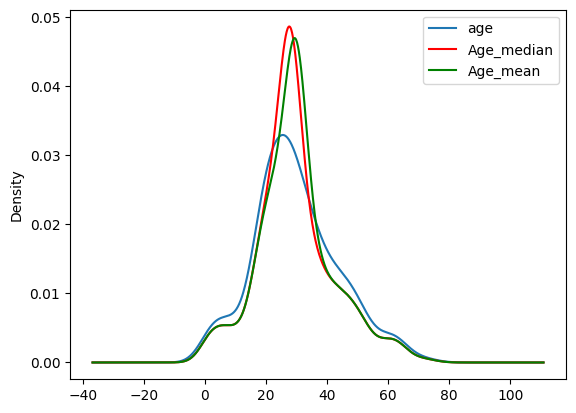

In [11]:
# We can see that the distribution has changed:
# there are now more values towards the median
# or median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["age"].plot(kind="kde", ax=ax)

# variable imputed with the median
X_train["Age_median"].plot(kind="kde", ax=ax, color="red")

# variable imputed with the mean
X_train["Age_mean"].plot(kind="kde", ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [12]:
# We also said that mean / median imputation may affect the relationship
# with the other variables in the dataset.

# Let's have a look.

X_train[["fare", "age", "Age_median", "Age_mean"]].cov()

,fare,age,Age_median,Age_mean
fare,2199.947144,111.318279,93.569378,89.939797
age,111.318279,194.299260,194.299260,194.299260
Age_median,93.569378,194.299260,157.701547,157.094053
Age_mean,89.939797,194.299260,157.094053,157.105908


<Axes: >

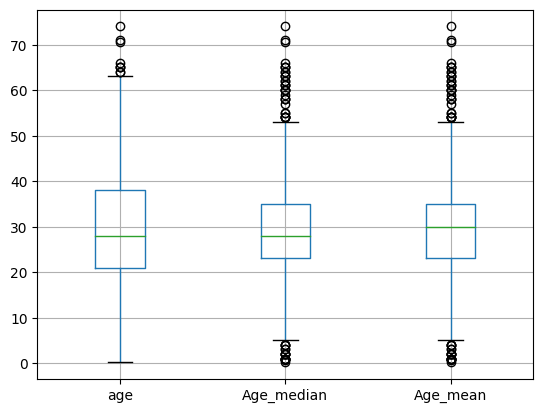

In [13]:
# Finally, I mentioned that mean / median imputation may lead
# inliers to look like outliers.

# In other words, mean / median imputation may lead to an increase
# in the number of detected outliers.

# Let's find out using a boxplot.
X_train[["age", "Age_median", "Age_mean"]].boxplot()

In [14]:
# We'll use the following variables,
# 3 of which contain NA.

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]


In [15]:
data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/houseprice.csv", usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [16]:
# print the variables with missing data.

# In the next list comprehension, I loop over all the columns
# of the dataset and select those with missing data.

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
# Find the percentage of missing data in those variables
# (same code used in section 3).

data[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [18]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

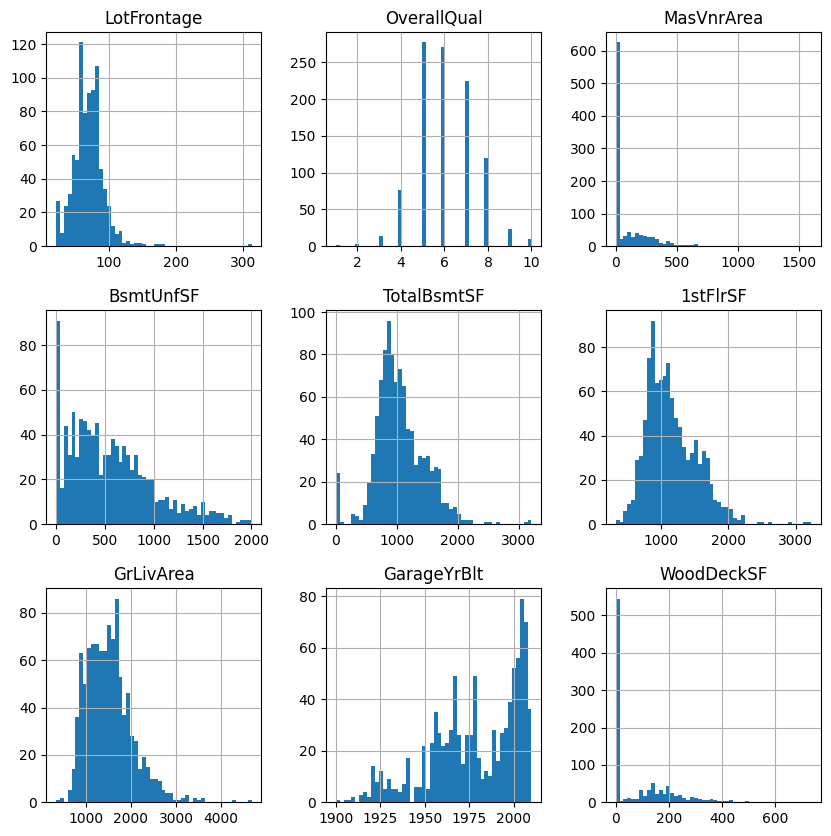

In [19]:
# Let's plot the distributions of the variables.
# We learned this code in section 3.

X_train.hist(bins=50, figsize=(10, 10))
plt.show()

In [20]:
# Create a new variable with missing values replaced
# by the median using the function we created previously.

# I repeat the following lines for each of the variables with NA
# over the next cells.

median = X_train["LotFrontage"].median()

X_train["LotFrontage_median"] = X_train["LotFrontage"].fillna(median)
X_test["LotFrontage_median"] = X_test["LotFrontage"].fillna(median)

In [21]:
median = X_train["MasVnrArea"].median()

X_train["MasVnrArea_median"] = X_train["MasVnrArea"].fillna(median)
X_test["MasVnrArea_median"] = X_test["MasVnrArea"].fillna(median)

In [22]:
median = X_train["GarageYrBlt"].median()

X_train["GarageYrBlt_median"] = X_train["GarageYrBlt"].fillna(median)
X_test["GarageYrBlt_median"] = X_test["GarageYrBlt"].fillna(median)

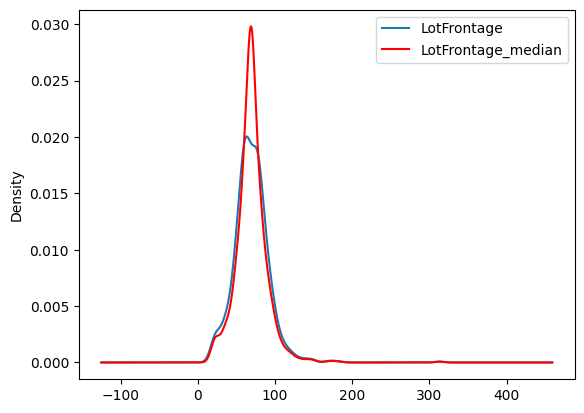

In [23]:
# Let's evaluate the effect of median imputation on the distribution.

# We can see that the distribution has changed for LotFrontAge,
# there are more values towards the median.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution.
X_train["LotFrontage"].plot(kind="kde", ax=ax)

# Variable imputed with the median.
X_train["LotFrontage_median"].plot(kind="kde", ax=ax, color="red")

# Add legends.
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

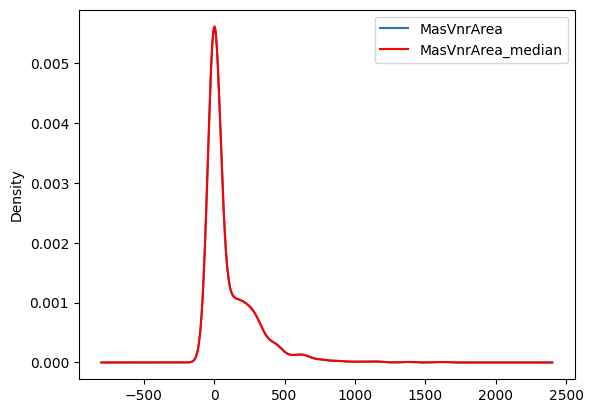

In [24]:
# For MasVnrArea, because the percentage of missing data
# was low, we don't expect and won't see a dramatic change in the
# distribution of the variable.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["MasVnrArea"].plot(kind="kde", ax=ax)

# variable imputed with the median
X_train["MasVnrArea_median"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

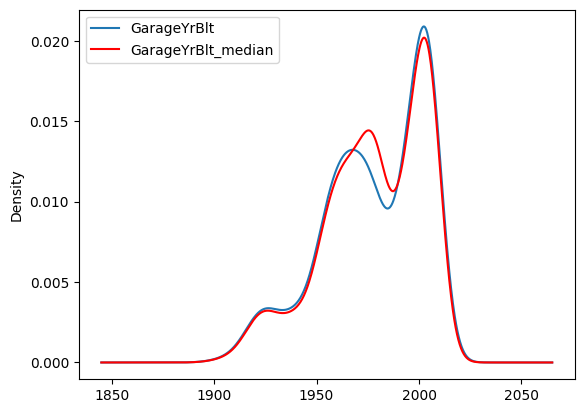

In [25]:
# Similarly, for GarageBlt, because the percentage of missing data
# was low, we don't expect a big change in the
# distribution. However, we see more values
# around the median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["GarageYrBlt"].plot(kind="kde", ax=ax)

# variable imputed with the median
X_train["GarageYrBlt_median"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [26]:
# We can also explore the effect of the imputation technique on
# the variance.

# We can see a change in the variance after imputation of LotFrontAge.
# This is expected, because the percentage of missing data is quite
# high ~20%.

print("Original Variance: ", X_train["LotFrontage"].var())
print("Variance after median imputation: ", X_train["LotFrontage_median"].var())

Original Variance:  532.5872021885677
Variance after median imputation:  434.0660426541647


In [27]:
# This is not the case for MasnVnrArea,
# because the % of missing data was small.

print("Original Variance: ", X_train["MasVnrArea"].var())
print("Variance after median imputation: ", X_train["MasVnrArea_median"].var())

Original Variance:  32983.53871003956
Variance after median imputation:  32874.27007404199


In [28]:
# For GarageBlt, the % of missing data was small, so the effect
# on the variance will also be small.

print("Original Variance: ", X_train["GarageYrBlt"].var())
print("Variance after median imputation: ", X_train["GarageYrBlt_median"].var())

Original Variance:  624.3059475074142
Variance after median imputation:  591.3356883144761


In [29]:
# Finally, let's explore the covariance:
# Take your time to compare the values in the table below.
# See how the covariance is affected for LotFrontAge but not
# so much for the other 2 variables.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,680.560330,949.657293,2908.855504,3379.793504,3919.951834,30.611717,134.741376,532.587202,674.423263,28.095264
OverallQual,6.587119,1.843859,101.496976,174.614725,288.624075,224.297266,409.124216,17.902809,31.685571,5.384774,100.533003,16.875386
MasVnrArea,680.560330,101.496976,32983.538710,7540.788093,24788.765410,20865.952051,35207.851440,1203.583792,3208.924282,553.921303,32983.538710,1134.380889
BsmtUnfSF,949.657293,174.614725,7540.788093,187524.082211,75133.073210,49874.491456,52033.920768,1823.065167,-1833.200962,788.095358,7472.110064,1724.141544
TotalBsmtSF,2908.855504,288.624075,24788.765410,75133.073210,168293.103282,121207.901604,86151.918290,3173.042442,12279.657062,2370.929189,24654.359956,2989.473391
1stFlrSF,3379.793504,224.297266,20865.952051,49874.491456,121207.901604,139865.628874,104440.129463,2009.195552,11094.055866,2750.747094,20801.356845,1890.271636
GrLivArea,3919.951834,409.124216,35207.851440,52033.920768,86151.918290,104440.129463,268127.660673,2738.982988,15583.954782,3189.685753,34967.143367,2576.345636
GarageYrBlt,30.611717,17.902809,1203.583792,1823.065167,3173.042442,2009.195552,2738.982988,624.305948,665.891118,24.755173,1182.673336,624.305948
WoodDeckSF,134.741376,31.685571,3208.924282,-1833.200962,12279.657062,11094.055866,15583.954782,665.891118,16485.820460,106.009105,3212.100972,627.624634
LotFrontage_median,532.587202,5.384774,553.921303,788.095358,2370.929189,2750.747094,3189.685753,24.755173,106.009105,434.066043,548.848031,22.883476


<Axes: >

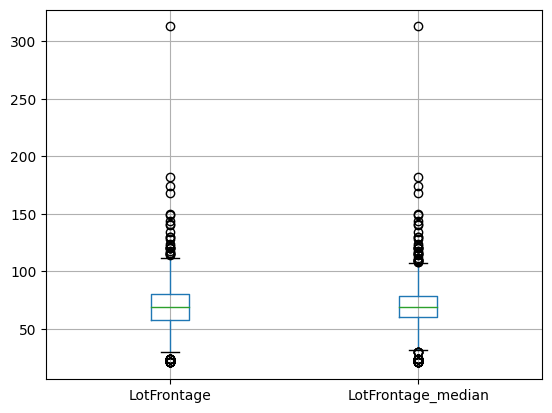

In [30]:
# Finally, let's explore the effect on outliers.

# There is a decrease in the outlier boundaries for LotFrontage
# (look at the height of the top whiskers),
# but there is not a visible effect for the other 2 variables.

X_train[["LotFrontage", "LotFrontage_median"]].boxplot()

<Axes: >

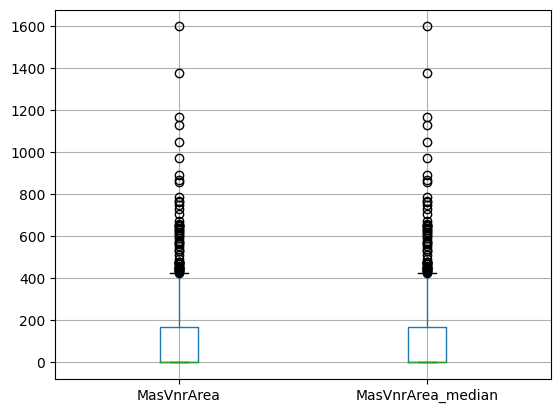

In [31]:
X_train[["MasVnrArea", "MasVnrArea_median"]].boxplot()

<Axes: >

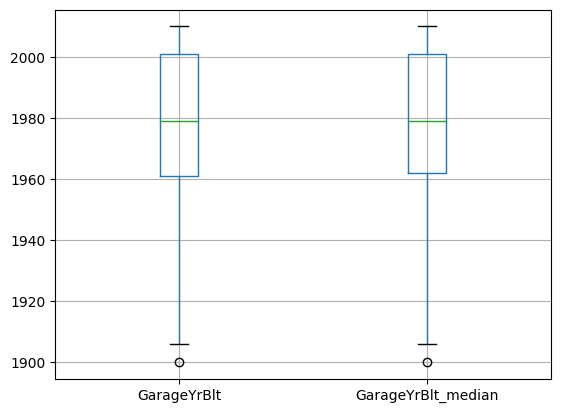

In [32]:
X_train[["GarageYrBlt", "GarageYrBlt_median"]].boxplot()